In [98]:
import pandas as pd

In [99]:
df = pd.read_csv("questions_csv.csv", delimiter='@')

In [100]:
df.head()

,Nome da matéria,Nome do módulo,Pergunta
0,Fisica,Ordem de Grandeza,"Nos trabalhos científicos, números muito grand..."
1,Fisica,Ordem de Grandeza,"Leia as notícias: ""A NGC 4151 está localizada ..."
2,Fisica,Ordem de Grandeza,Um adulto humano saudável abriga cerca de 100 ...
3,Fisica,Ordem de Grandeza,"A distância que a luz percorre em um ano, cham..."
4,Fisica,Ordem de Grandeza,A nanotecnologia é um dos ramos mais promissor...


In [101]:
df.shape

(37744, 3)

In [102]:
col = ['Nome da matéria', 'Pergunta']
df= df[col]
df= df[pd.notnull(df['Pergunta'])]

In [103]:
df.columns=['Materia', 'Pergunta']

In [104]:
df['category_id'] = df['Materia'].factorize()[0]

In [105]:
cat_id_df = df[["Materia", "category_id"]].drop_duplicates().sort_values('category_id')

In [106]:
cat_to_id = dict(cat_id_df.values)

In [107]:
id_to_cat = dict(cat_id_df[['category_id','Materia']].values)

In [108]:
df.head()

,Materia,Pergunta,category_id
0,Fisica,"Nos trabalhos científicos, números muito grand...",0
1,Fisica,"Leia as notícias: ""A NGC 4151 está localizada ...",0
2,Fisica,Um adulto humano saudável abriga cerca de 100 ...,0
3,Fisica,"A distância que a luz percorre em um ano, cham...",0
4,Fisica,A nanotecnologia é um dos ramos mais promissor...,0


In [109]:
df.tail()

,Materia,Pergunta,category_id
37739,Espanhol,"Com base no texto, assinale a alternativa corr...",12
37740,Espanhol,Medio millón de personas en Lima habla una len...,12
37741,Espanhol,Que a alguien le guste el jazz o que su clásic...,12
37742,Espanhol,Preámbulo a las instrucciones para dar cuerda ...,12
37743,Espanhol,Hay quien dice que soy como la cabra; Lo dicen...,12


In [110]:
import matplotlib.pyplot as plt

In [111]:
fig = plt.figure(figsize= (8,6))

<Figure size 576x432 with 0 Axes>

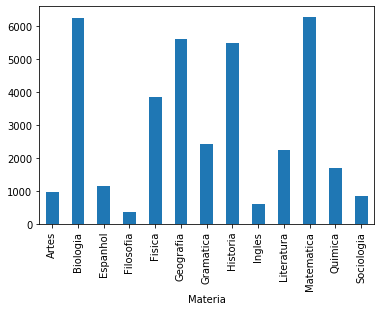

In [112]:
df.groupby('Materia').Pergunta.count().plot.bar(ylim=0)

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [114]:
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 13, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words =stopwords.words('portuguese')) #to remove all common pronouns to reduce the number of noisy features

In [115]:
features = tfidf.fit_transform(df.Pergunta).toarray()

In [116]:
labels = df.category_id
features.shape

(37735, 25572)

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

In [119]:
count_vect = CountVectorizer()

In [120]:
X_train, X_test, y_train, y_test = train_test_split(df['Pergunta'], df['Materia'], random_state=0)

In [121]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [ ]:
print(clf.predict(count_vect.transform(['Um carro, movendo-se a 20 m/s, freia até parar completamente'])))

In [ ]:
y_pred = clf.predict(count_vect.transform(X_test))

In [ ]:
from sklearn import metrics

In [ ]:
print(df)

In [ ]:
print(metrics.classification_report(y_test,y_pred, labels= df.Materia.unique(), target_names=df['Materia'].unique()))